In [1]:
import json
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from math import log
import time
import warnings

In [2]:
VOCAB_SIZE = 5000

# Exploritory Data analysis 

In [3]:
d1 = pd.read_json(path_or_buf="./data/domain1_train.json/domain1_train.json", lines=True)

In [116]:
d1.iloc[0]

text     [70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0,...
label                                                    1
Name: 0, dtype: object

In [117]:
d1['text'][0]

[70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0, 1004, 19, 0, 0, 7, 913]

In [118]:
d1['label'][0]

1

In [4]:
d1.head()

,text,label
0,"[70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0,...",1
1,"[1209, 179, 1952, 4, 4959, 7, 0, 2, 978, 1522,...",1
2,"[287, 3, 3330, 0, 23, 12, 13, 465, 74, 8, 0, 8...",1
3,"[0, 0, 3, 592, 19, 2, 706, 1439, 2575, 7, 2, 0...",1
4,"[9, 2, 110, 12, 42, 32, 44, 361, 9, 3860, 2358...",1


In [5]:
texts_all_d1 = d1["text"]

In [6]:
counter_all_d1 = Counter()

In [7]:
for text in texts_all_d1:
    for word in text:
        counter_all_d1[word] +=1

In [8]:
len(counter_all_d1)

4926

In [9]:
texts_human_d1 = d1[d1["label"] == 1]["text"]
counter_human_d1 = Counter()
for text in texts_human_d1:
    for word in text:
        counter_human_d1[word] +=1
len(counter_human_d1)

4836

In [109]:
d1["text"].apply(len).max()

238

In [114]:
(d2["text"].apply(len) > 512).sum()

758

In [10]:
texts_human_d1.apply(len).mean()

27.281128205128205

In [11]:
texts_ai_d1 = d1[d1["label"] == 0]["text"]
counter_ai_d1 = Counter()
for text in texts_ai_d1:
    for word in text:
        counter_ai_d1[word] +=1
len(counter_ai_d1)

4514

In [12]:
texts_ai_d1.apply(len).mean()

52.249435897435895

In [13]:
d2 = pd.read_json(path_or_buf="./data/domain2_train.json/domain2_train.json", lines=True)

In [14]:
texts_all_d2 = d2["text"]
counter_all_d2 = Counter()
for text in texts_all_d2:
    for word in text:
        counter_all_d2[word] +=1
len(counter_all_d2)

4955

In [15]:
texts_human_d2 = d2[d2["label"] == 1]["text"]
counter_human_d2 = Counter()
for text in texts_human_d2:
    for word in text:
        counter_human_d2[word] +=1
len(counter_human_d2)

4914

In [16]:
len(texts_human_d2)

2150

In [17]:
texts_human_d2.apply(len).mean()

216.9660465116279

In [18]:
texts_human_d2.apply(len).median()

165.0

In [19]:
texts_ai_d2 = d2[d2["label"] == 0]["text"]
counter_ai_d2 = Counter()
for text in texts_ai_d2:
    for word in text:
        counter_ai_d2[word] +=1
len(counter_ai_d2)

4947

In [20]:
texts_ai_d2.apply(len).mean()

146.33654901960784

In [21]:
len(texts_ai_d2)

12750

In [22]:
zip(*counter_all_d1.most_common())

In [23]:
counter_all_d1.most_common()

[(0, 89837),
 (2, 56310),
 (1, 39104),
 (3, 39040),
 (6, 26353),
 (4, 19118),
 (5, 15303),
 (7, 14812),
 (9, 14685),
 (12, 10773),
 (17, 7948),
 (16, 7773),
 (48, 6090),
 (10, 5512),
 (8, 5432),
 (18, 5398),
 (15, 5273),
 (33, 4907),
 (13, 4746),
 (28, 4632),
 (22, 4338),
 (19, 4267),
 (62, 3844),
 (63, 3837),
 (30, 3832),
 (31, 3661),
 (47, 3394),
 (40, 2975),
 (24, 2794),
 (41, 2756),
 (35, 2686),
 (32, 2277),
 (38, 2270),
 (73, 2240),
 (112, 2170),
 (21, 2128),
 (103, 2109),
 (126, 2101),
 (96, 2028),
 (14, 1983),
 (104, 1945),
 (26, 1908),
 (29, 1766),
 (82, 1741),
 (95, 1741),
 (44, 1647),
 (42, 1625),
 (55, 1518),
 (43, 1514),
 (49, 1499),
 (51, 1479),
 (23, 1468),
 (142, 1317),
 (183, 1310),
 (211, 1302),
 (141, 1292),
 (213, 1270),
 (34, 1267),
 (189, 1257),
 (224, 1230),
 (206, 1229),
 (60, 1226),
 (64, 1208),
 (87, 1200),
 (70, 1153),
 (107, 1141),
 (80, 1136),
 (72, 1132),
 (11, 1129),
 (199, 1107),
 (89, 1105),
 (20, 1091),
 (45, 1056),
 (53, 1048),
 (56, 1016),
 (150, 1013

In [24]:
testList2_human = [log(elem2) for elem1, elem2 in counter_human_d1.most_common()]
testList2_ai = [log(elem2) for elem1, elem2 in counter_ai_d1.most_common()]

In [25]:
testList2_human

[10.693489174459955,
 9.602112152952344,
 9.352534137679358,
 8.952864141581468,
 8.826000545482966,
 8.75115798136203,
 8.617038526385954,
 8.61323037961318,
 8.466320861042481,
 7.867105500316739,
 7.8050670442584895,
 7.742835955430749,
 7.62657020629066,
 7.528869256642251,
 7.441906728051625,
 7.299797366758161,
 7.27931883541462,
 7.25063551189868,
 7.135687347028144,
 7.083387847625295,
 7.074963197966044,
 7.07326971745971,
 7.023758954738443,
 6.956545443151569,
 6.902742737158593,
 6.897704943128636,
 6.874198495453294,
 6.872128101338986,
 6.8690144506657065,
 6.851184927493743,
 6.838405200847344,
 6.822197390620491,
 6.816735880594968,
 6.787844982309579,
 6.760414691083428,
 6.741700694652055,
 6.635946555686647,
 6.61472560020376,
 6.612041034833092,
 6.513230110912307,
 6.455198563340122,
 6.450470422144176,
 6.450470422144176,
 6.403574197934815,
 6.400257445308821,
 6.3818160174060985,
 6.315358001522335,
 6.313548046277095,
 6.298949246855942,
 6.278521424165844,
 6.

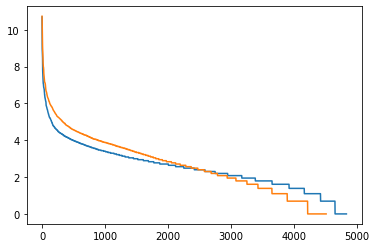

In [26]:
plt.plot(testList2_human)

plt.plot(testList2_ai)

plt.show()

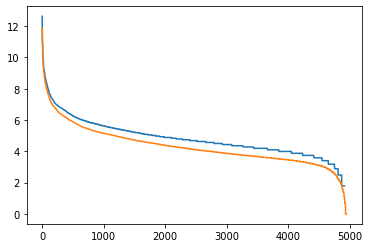

In [27]:
testList_human = [log(elem2*6) for elem1, elem2 in counter_human_d2.most_common()]
testList_ai = [log(elem2) for elem1, elem2 in counter_ai_d2.most_common()]
plt.plot(testList_human)

plt.plot(testList_ai)

plt.show()

In [28]:
len(texts_ai_d2)/len(texts_human_d2)

5.930232558139535

# Feature Engineering/Selection

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

In [30]:
def get_BOW(row):
    text = row['text']
    bow = [0 for i in range(VOCAB_SIZE)]
    for idx in text:
        bow[idx]+=1
    return np.array(bow)

In [31]:
# Define the vocabulary explicitly as a list of integers from 0 to 4999
vocabulary = [str(i) for i in range(VOCAB_SIZE)]

# Initialize the CountVectorizer with the predefined vocabulary
vectorizer = CountVectorizer(vocabulary=vocabulary)

# Fit and transform the text data to obtain a feature matrix
bow_matrix_1 = vectorizer.fit_transform(d1["text"].apply(lambda x: " ".join(map(str, x))))

# Convert the feature matrix to a dense NumPy array if needed
#dense_bow_matrix = bow_matrix.toarray()


In [32]:
X_train, X_test, y_train, y_test = train_test_split(bow_matrix_1, d1['label'], test_size=0.2, random_state=42)

In [33]:
X_train

<15600x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 307552 stored elements in Compressed Sparse Row format>

In [34]:
y_train

18319    0
8086     1
447      1
12545    0
7176     1
        ..
11284    0
11964    0
5390     1
860      1
15795    0
Name: label, Length: 15600, dtype: int64

In [35]:
bow_matrix_1.shape

(19500, 5000)

In [36]:
vt = VarianceThreshold(threshold=0.001)

In [37]:
#Train a logistic regression model.
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9076923076923077
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1943
           1       0.88      0.94      0.91      1957

    accuracy                           0.91      3900
   macro avg       0.91      0.91      0.91      3900
weighted avg       0.91      0.91      0.91      3900



/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
scores = cross_validate(model, bow_matrix_1, d1['label'], cv=5,scoring=('balanced_accuracy', 'f1', 'roc_auc'))
print(scores['test_balanced_accuracy'].mean())
print(scores['test_f1'].mean())
print(scores['test_roc_auc'].mean())

/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.9073333333333334
0.9097560012959486
0.9633188165680474


/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
bow_vt_1 = vt.fit_transform(bow_matrix_1)

In [40]:
bow_vt_1.shape

(19500, 3177)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(bow_vt_1, d1['label'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9061538461538462
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1943
           1       0.88      0.94      0.91      1957

    accuracy                           0.91      3900
   macro avg       0.91      0.91      0.91      3900
weighted avg       0.91      0.91      0.91      3900



/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
tfidf = TfidfTransformer()

In [43]:
tfidf_matrix_1 = tfidf.fit_transform(bow_matrix_1)

In [44]:
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(tfidf_matrix_1, d1['label'], test_size=0.2, random_state=42)
model.fit(X_t_train, y_t_train)

# Predict on the test set.
y_t_pred = model.predict(X_t_test)

# Evaluate the model.
accuracy = accuracy_score(y_t_test, y_t_pred)
report = classification_report(y_t_test, y_t_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9048717948717949
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1943
           1       0.86      0.97      0.91      1957

    accuracy                           0.90      3900
   macro avg       0.91      0.90      0.90      3900
weighted avg       0.91      0.90      0.90      3900



In [45]:
scores = cross_validate(model, tfidf_matrix_1, d1['label'], cv=5,scoring=('balanced_accuracy', 'f1', 'roc_auc'))
print(scores['test_balanced_accuracy'].mean())
print(scores['test_f1'].mean())
print(scores['test_roc_auc'].mean())

0.9041538461538462
0.9096091460034728
0.9610606706114397


In [46]:
vt1 = VarianceThreshold(threshold=0.0001)
tfidf_vt_1 = vt1.fit_transform(tfidf_matrix_1)

In [47]:
tfidf_vt_1.shape

(19500, 2687)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vt_1, d1['label'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9012820512820513
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1943
           1       0.86      0.96      0.91      1957

    accuracy                           0.90      3900
   macro avg       0.91      0.90      0.90      3900
weighted avg       0.91      0.90      0.90      3900



In [49]:
bow_matrix_2 = vectorizer.fit_transform(d2["text"].apply(lambda x: " ".join(map(str, x))))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(bow_matrix_2, d2['label'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
print(f"roc_auc_score: {roc_auc}")
print(report)

Accuracy: 0.8067114093959732
f1: 0.20661157024793392
roc_auc_score: 0.5904268363048872
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2544
           1       0.26      0.17      0.21       436

    accuracy                           0.81      2980
   macro avg       0.56      0.54      0.55      2980
weighted avg       0.78      0.81      0.79      2980



/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [52]:
confusion_matrix(y_test, y_pred)

array([[2329,  215],
       [ 361,   75]])

In [53]:
# scores = cross_validate(model, bow_matrix_2, d2['label'], cv=5,scoring=('balanced_accuracy', 'f1', 'roc_auc'))
# print(scores['test_balanced_accuracy'].mean())
# print(scores['test_f1'].mean())
# print(scores['test_roc_auc'].mean())

In [54]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [55]:
def test_oversample(X_train, y_train, X_test, y_test, oversample, model):
    X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)
    model.fit(X_train_o, y_train_o)

    # Predict on the test set.
    y_pred = model.predict(X_test)

    # Evaluate the model.
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"f1: {f1}")
    print(f"roc_auc_score: {roc_auc}")
    print(report)
    print("-"*40)

In [56]:
test_oversample(X_train, y_train, X_test, y_test, oversample, model)

Accuracy: 0.7345637583892617
f1: 0.27762557077625577
roc_auc_score: 0.572485719231435
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2544
           1       0.23      0.35      0.28       436

    accuracy                           0.73      2980
   macro avg       0.55      0.57      0.56      2980
weighted avg       0.78      0.73      0.76      2980

----------------------------------------


/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)
model.fit(X_train_o, y_train_o)

# Predict on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7479865771812081
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      2544
           1       0.25      0.37      0.30       436

    accuracy                           0.75      2980
   macro avg       0.57      0.59      0.57      2980
weighted avg       0.79      0.75      0.77      2980



/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
%%time
smote = SMOTE()
test_oversample(X_train, y_train, X_test, y_test, smote, model)

Accuracy: 0.7550335570469798
f1: 0.22008547008547008
roc_auc_score: 0.5304881786971323
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2544
           1       0.21      0.24      0.22       436

    accuracy                           0.76      2980
   macro avg       0.54      0.54      0.54      2980
weighted avg       0.77      0.76      0.76      2980

----------------------------------------
CPU times: user 425 ms, sys: 36.1 ms, total: 461 ms
Wall time: 460 ms


/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
%%time
bsmote = BorderlineSMOTE()
test_oversample(X_train, y_train, X_test, y_test, bsmote, model)

Accuracy: 0.7550335570469798
f1: 0.2283298097251586
roc_auc_score: 0.5347633936299117
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2544
           1       0.21      0.25      0.23       436

    accuracy                           0.76      2980
   macro avg       0.54      0.54      0.54      2980
weighted avg       0.77      0.76      0.76      2980

----------------------------------------
CPU times: user 955 ms, sys: 185 ms, total: 1.14 s
Wall time: 1.14 s


/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
%%time
svmsmote = SVMSMOTE()
test_oversample(X_train, y_train, X_test, y_test, svmsmote, model)

Accuracy: 0.7684563758389261
f1: 0.2159090909090909
roc_auc_score: 0.534302694593503
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2544
           1       0.21      0.22      0.22       436

    accuracy                           0.77      2980
   macro avg       0.54      0.54      0.54      2980
weighted avg       0.77      0.77      0.77      2980

----------------------------------------
CPU times: user 38.7 s, sys: 340 ms, total: 39.1 s
Wall time: 39.1 s


/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
%%time
adasyn = ADASYN()
test_oversample(X_train, y_train, X_test, y_test, adasyn, model)

Accuracy: 0.7560402684563758
f1: 0.22411953041622198
roc_auc_score: 0.5305837444463678
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2544
           1       0.21      0.24      0.22       436

    accuracy                           0.76      2980
   macro avg       0.54      0.54      0.54      2980
weighted avg       0.77      0.76      0.76      2980

----------------------------------------
CPU times: user 1.05 s, sys: 99.8 ms, total: 1.14 s
Wall time: 1.15 s


/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
tfidf_matrix_2 = tfidf.fit_transform(bow_matrix_2)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_2, d2['label'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
print(f"roc_auc_score: {roc_auc}")
print(report)

Accuracy: 0.8530201342281879
f1: 0.009049773755656108
roc_auc_score: 0.7008025719808436
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2544
           1       0.33      0.00      0.01       436

    accuracy                           0.85      2980
   macro avg       0.59      0.50      0.46      2980
weighted avg       0.78      0.85      0.79      2980



In [64]:
confusion_matrix(y_test, y_pred)

array([[2540,    4],
       [ 434,    2]])

In [65]:
scores = cross_validate(model, tfidf_matrix_2, d2['label'], cv=5,scoring=('balanced_accuracy', 'f1', 'roc_auc'))
print(scores['test_balanced_accuracy'].mean())
print(scores['test_f1'].mean())
print(scores['test_roc_auc'].mean())

0.5023538531691747
0.012798252598638246
0.6752184222526221


In [66]:
test_oversample(X_train, y_train, X_test, y_test, smote, model)
test_oversample(X_train, y_train, X_test, y_test, bsmote, model)
test_oversample(X_train, y_train, X_test, y_test, svmsmote, model)
test_oversample(X_train, y_train, X_test, y_test, adasyn, model)

Accuracy: 0.6959731543624161
f1: 0.304147465437788
roc_auc_score: 0.6535606355663262
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      2544
           1       0.23      0.45      0.30       436

    accuracy                           0.70      2980
   macro avg       0.56      0.60      0.55      2980
weighted avg       0.79      0.70      0.73      2980

----------------------------------------
Accuracy: 0.7077181208053691
f1: 0.3168627450980392
roc_auc_score: 0.6528033220818186
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      2544
           1       0.24      0.46      0.32       436

    accuracy                           0.71      2980
   macro avg       0.57      0.61      0.57      2980
weighted avg       0.80      0.71      0.74      2980

----------------------------------------
Accuracy: 0.8402684563758389
f1: 0.14388489208633093
roc_auc_score: 0.6844968914084588
      

In [67]:
tfidf_vt_2 = vt1.fit_transform(tfidf_matrix_2)
X_train, X_test, y_train, y_test = train_test_split(tfidf_vt_2, d2['label'], test_size=0.2, random_state=42)
tfidf_vt_2.shape

(14900, 2203)

In [68]:
test_oversample(X_train, y_train, X_test, y_test, smote, model)
test_oversample(X_train, y_train, X_test, y_test, bsmote, model)
test_oversample(X_train, y_train, X_test, y_test, svmsmote, model)
test_oversample(X_train, y_train, X_test, y_test, adasyn, model)

Accuracy: 0.7328859060402685
f1: 0.2968197879858657
roc_auc_score: 0.647198300732791
              precision    recall  f1-score   support

           0       0.88      0.79      0.84      2544
           1       0.24      0.39      0.30       436

    accuracy                           0.73      2980
   macro avg       0.56      0.59      0.57      2980
weighted avg       0.79      0.73      0.76      2980

----------------------------------------
Accuracy: 0.7369127516778523
f1: 0.2974910394265233
roc_auc_score: 0.653084609947493
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2544
           1       0.24      0.38      0.30       436

    accuracy                           0.74      2980
   macro avg       0.56      0.59      0.57      2980
weighted avg       0.79      0.74      0.76      2980

----------------------------------------
Accuracy: 0.771476510067114
f1: 0.26218851570964247
roc_auc_score: 0.6527438188794645
        

In [69]:
#pd.Series(X.ravel()).apply(lambda x: " ".join(map(str, x)))

In [121]:
def get_k_val(d1x, d1y, d2x, d2y, k):
    output = []
    
    samples_per_class_in_test = 250  # Adjust as needed

    # Initialize empty lists to store the train and test indices
    train_indices1 = [[] for i in range(k)]
    train_indices2 = [[] for i in range(k)]
    test_indices1 = [[] for i in range(k)]
    test_indices2 = [[] for i in range(k)]
    
    for class_label in [0,1]:
        # Get the indices of samples belonging to the current class
        class_indices1 = np.where(d1y == class_label)[0]
        class_indices2 = np.where(d2y == class_label)[0]

        # Randomly select samples_per_class_in_test samples from this class
        selected_indices1 = np.random.choice(class_indices1, samples_per_class_in_test*k, replace=False)
        selected_indices2 = np.random.choice(class_indices2, samples_per_class_in_test*k, replace=False)
        
        selected_indices1 = selected_indices1.reshape(k, samples_per_class_in_test)
        selected_indices2 = selected_indices2.reshape(k, samples_per_class_in_test)
        
        for i in range(k):
            test_indices1[i].extend(selected_indices1[i])
            test_indices2[i].extend(selected_indices2[i])
            

            # Add the remaining samples to the train set indices
            remaining_indices = np.setdiff1d(class_indices1, selected_indices1[i])
            train_indices1[i].extend(remaining_indices)
            
            remaining_indices = np.setdiff1d(class_indices2, selected_indices2[i])
            train_indices2[i].extend(remaining_indices)
    print(len(train_indices1[0]))
    print(len(train_indices2[0]))
    print(type(d1x[train_indices1[0]]))
    print(type(d1y[train_indices1[0]]))
    for i in range(k):
        # Split the data into train and test sets using the selected indices
        output.append([d1x[train_indices1[i]].append(d2x[train_indices2[i]], ignore_index = True), d1x[test_indices1[i]].append(d2x[test_indices2[i]], ignore_index= True), d1y[train_indices1[i]].append(d2y[train_indices2[i]], ignore_index= True), d1y[test_indices1[i]].append(d2y[test_indices2[i]], ignore_index= True)])
    
    return output, len(train_indices1[0])


In [122]:
data, d1_len = get_k_val(d1['text'], d1['label'], d2['text'], d2['label'], 5)

19000
14400
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [72]:
d1_len

19000

In [73]:
#feature_data = get_k_val(bow_matrix_1.toarray, d1['label'], bow_matrix_2, d2['label'], 5)

In [74]:
X_train, X_test, y_train, y_test = data[0]

In [75]:
X_train.shape

(33400,)

In [76]:
X_train[19000:].shape

(14400,)

In [77]:
X_train_2 = X_train[19000:]
y_train_2 = y_train[19000:]

In [78]:
X_test.shape

(1000,)

In [79]:
y_train.shape

(33400,)

In [80]:
y_test.shape

(1000,)

In [81]:
y_train.sum()

11400

In [82]:
y_test.sum()

500

In [83]:
bow_matrix_train = vectorizer.fit_transform(X_train.apply(lambda x: " ".join(map(str, x))))
bow_matrix_test = vectorizer.transform(X_test.apply(lambda x: " ".join(map(str, x))))

tfidf_matrix_train = tfidf.fit_transform(bow_matrix_train)
tfidf_matrix_test = tfidf.transform(bow_matrix_test)

In [84]:
bow_matrix_train.shape

(33400, 5000)

In [85]:
bow_matrix_train[:19000].shape

(19000, 5000)

In [86]:
y_train[:19000].shape

(19000,)

In [87]:
bow_matrix_train_2 = bow_matrix_train[19000:]
y_train_2 = y_train[19000:]

In [88]:
bow_matrix_train_2_o, y_train_2_o = oversample.fit_resample(bow_matrix_train_2, y_train_2)

In [89]:
bow_matrix_train_2_o.shape

(25000, 5000)

In [90]:
y_train_2_o.shape

(25000,)

In [91]:
import scipy as sp
X_train_o = sp.sparse.vstack((bow_matrix_train[:19000], bow_matrix_train_2_o))

In [92]:
type(bow_matrix_train)

scipy.sparse._csr.csr_matrix

In [93]:
type(X_train_o)

scipy.sparse._csr.csr_matrix

In [94]:
y_train_o = np.append(y_train[:19000], y_train_2_o)

In [95]:
model = LogisticRegression(class_weight='balanced')

In [96]:
model.fit(X_train_o, y_train_o)

/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [97]:
# Predict on the test set.
y_pred = model.predict(bow_matrix_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(bow_matrix_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
print(f"roc_auc_score: {roc_auc}")
print(report)

Accuracy: 0.724
f1: 0.7006507592190889
roc_auc_score: 0.776104
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       500
           1       0.77      0.65      0.70       500

    accuracy                           0.72      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.73      0.72      0.72      1000



In [98]:
print(bow_matrix_train.shape)
print(bow_matrix_test.shape)
print(tfidf_matrix_train.shape)
print(tfidf_matrix_test.shape)

(33400, 5000)
(1000, 5000)
(33400, 5000)
(1000, 5000)


In [99]:
def evaluate(X_train, y_train, X_test, y_test, model, d1_len, oversample = None):
    if oversample is not None:
        
        X_train_2_o, y_train_2_o = oversample.fit_resample(X_train[d1_len:], y_train[d1_len:])
        X_train_o = sp.sparse.vstack((X_train[:d1_len], X_train_2_o))
        y_train_o = np.append(y_train[:d1_len], y_train_2_o)
        
        model.fit(X_train_o, y_train_o)
    else:
        model.fit(X_train, y_train)
    
    # Predict on the test set.
    y_pred = model.predict(X_test)

    # Evaluate the model.
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"f1: {f1}")
    print(f"roc_auc_score: {roc_auc}")
    print(report)
    print("-"*50)
    # Predict on the test set.
    print('Domain1')
    y_pred = model.predict(X_test[:500])
    # Evaluate the model.
    accuracy = accuracy_score(y_test[:500], y_pred)
    f1 = f1_score(y_test[:500], y_pred)
    roc_auc = roc_auc_score(y_test[:500], model.predict_proba(X_test[:500])[:, 1])
    report = classification_report(y_test[:500], y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"f1: {f1}")
    print(f"roc_auc_score: {roc_auc}")
    print(report)
    # Predict on the test set.
    print("-"*50)
    print("Domain 2")
    
    y_pred = model.predict(X_test[500:])
    # Evaluate the model.
    accuracy = accuracy_score(y_test[500:], y_pred)
    f1 = f1_score(y_test[500:], y_pred)
    roc_auc = roc_auc_score(y_test[500:], model.predict_proba(X_test[500:])[:, 1])
    report = classification_report(y_test[500:], y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"f1: {f1}")
    print(f"roc_auc_score: {roc_auc}")
    print(report)
    print("-"*50)

In [101]:
evaluate(bow_matrix_train, y_train, bow_matrix_test, y_test, model, d1_len)

Accuracy: 0.725
f1: 0.6913580246913581
roc_auc_score: 0.788752
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       500
           1       0.79      0.62      0.69       500

    accuracy                           0.73      1000
   macro avg       0.74      0.72      0.72      1000
weighted avg       0.74      0.72      0.72      1000

--------------------------------------------------
Domain1
Accuracy: 0.908
f1: 0.9122137404580152
roc_auc_score: 0.963936
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       250
           1       0.87      0.96      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

--------------------------------------------------
Domain 2
Accuracy: 0.542
f1: 0.3760217983651226
roc_auc_score: 0.550976
              precision    recall  f1-

/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
print("oversample")
evaluate(bow_matrix_train, y_train, bow_matrix_test, y_test, model, d1_len, oversample)
print("smote")
evaluate(bow_matrix_train, y_train, bow_matrix_test, y_test, model, d1_len, smote)
print("bsmote")
evaluate(bow_matrix_train, y_train, bow_matrix_test, y_test, model, d1_len, bsmote)
print("svmsmote")
evaluate(bow_matrix_train, y_train, bow_matrix_test, y_test, model, d1_len, svmsmote)
print("adasyn")
evaluate(bow_matrix_train, y_train, bow_matrix_test, y_test, model, d1_len, adasyn)

oversample


/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.718
f1: 0.6948051948051948
roc_auc_score: 0.776756
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       500
           1       0.76      0.64      0.69       500

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000

--------------------------------------------------
Domain1
Accuracy: 0.892
f1: 0.8941176470588236
roc_auc_score: 0.94744
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       250
           1       0.88      0.91      0.89       250

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

--------------------------------------------------
Domain 2
Accuracy: 0.544
f1: 0.4492753623188406
roc_auc_score: 0.546416
              precision    recall  f1-s

/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.727
f1: 0.6792009400705054
roc_auc_score: 0.7762319999999999
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       500
           1       0.82      0.58      0.68       500

    accuracy                           0.73      1000
   macro avg       0.75      0.73      0.72      1000
weighted avg       0.75      0.73      0.72      1000

--------------------------------------------------
Domain1
Accuracy: 0.908
f1: 0.9094488188976377
roc_auc_score: 0.96032
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       250
           1       0.90      0.92      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

--------------------------------------------------
Domain 2
Accuracy: 0.546
f1: 0.3381924198250729
roc_auc_score: 0.534464
              precision    re

/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.715
f1: 0.6666666666666666
roc_auc_score: 0.7742439999999999
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       500
           1       0.80      0.57      0.67       500

    accuracy                           0.71      1000
   macro avg       0.73      0.71      0.71      1000
weighted avg       0.73      0.71      0.71      1000

--------------------------------------------------
Domain1
Accuracy: 0.908
f1: 0.9098039215686274
roc_auc_score: 0.9586560000000001
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       250
           1       0.89      0.93      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

--------------------------------------------------
Domain 2
Accuracy: 0.522
f1: 0.3072463768115942
roc_auc_score: 0.5324000000000001
        

/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.721
f1: 0.6729191090269637
roc_auc_score: 0.783704
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       500
           1       0.81      0.57      0.67       500

    accuracy                           0.72      1000
   macro avg       0.74      0.72      0.71      1000
weighted avg       0.74      0.72      0.71      1000

--------------------------------------------------
Domain1
Accuracy: 0.906
f1: 0.9076620825147348
roc_auc_score: 0.9615680000000001
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       250
           1       0.89      0.92      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

--------------------------------------------------
Domain 2
Accuracy: 0.536
f1: 0.3255813953488372
roc_auc_score: 0.547088
              precision    r

/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
evaluate(tfidf_matrix_train, y_train, tfidf_matrix_test, y_test, model, d1_len)

Accuracy: 0.734
f1: 0.6921296296296295
roc_auc_score: 0.823184
              precision    recall  f1-score   support

           0       0.68      0.87      0.77       500
           1       0.82      0.60      0.69       500

    accuracy                           0.73      1000
   macro avg       0.75      0.73      0.73      1000
weighted avg       0.75      0.73      0.73      1000

--------------------------------------------------
Domain1
Accuracy: 0.922
f1: 0.9265536723163841
roc_auc_score: 0.967344
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       250
           1       0.88      0.98      0.93       250

    accuracy                           0.92       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500

--------------------------------------------------
Domain 2
Accuracy: 0.546
f1: 0.3183183183183183
roc_auc_score: 0.591632
              precision    recall  f1-

In [105]:
print("oversample")
evaluate(tfidf_matrix_train, y_train, tfidf_matrix_test, y_test, model, d1_len, oversample)
print("smote")
evaluate(tfidf_matrix_train, y_train, tfidf_matrix_test, y_test, model, d1_len, smote)
print("bsmote")
evaluate(tfidf_matrix_train, y_train, tfidf_matrix_test, y_test, model, d1_len, bsmote)
print("svmsmote")
evaluate(tfidf_matrix_train, y_train, tfidf_matrix_test, y_test, model, d1_len, svmsmote)
print("adasyn")
evaluate(tfidf_matrix_train, y_train, tfidf_matrix_test, y_test, model, d1_len, adasyn)

oversample


/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.734
f1: 0.7217573221757322
roc_auc_score: 0.832884
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       500
           1       0.76      0.69      0.72       500

    accuracy                           0.73      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.74      0.73      0.73      1000

--------------------------------------------------
Domain1
Accuracy: 0.896
f1: 0.896414342629482
roc_auc_score: 0.95656
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       250
           1       0.89      0.90      0.90       250

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

--------------------------------------------------
Domain 2
Accuracy: 0.572
f1: 0.5286343612334801
roc_auc_score: 0.618528
              precision    recall  f1-sc

/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.744
f1: 0.7276595744680852
roc_auc_score: 0.835852
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       500
           1       0.78      0.68      0.73       500

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000

--------------------------------------------------
Domain1
Accuracy: 0.908
f1: 0.9094488188976377
roc_auc_score: 0.9601919999999999
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       250
           1       0.90      0.92      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

--------------------------------------------------
Domain 2
Accuracy: 0.58
f1: 0.513888888888889
roc_auc_score: 0.612208
              precision    rec

/home/rainstyle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Selection

In [ ]:
from sklearn.utils import class_weight
from sklearn.linear_model import RidgeClassifier
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(d2['label']), y=d2['label'])

In [ ]:
model = LogisticRegression(class_weight='balanced')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_2, d2['label'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
print(f"roc_auc_score: {roc_auc}")
print(report)

In [ ]:
test_oversample(X_train, y_train, X_test, y_test, smote, model)
test_oversample(X_train, y_train, X_test, y_test, bsmote, model)
test_oversample(X_train, y_train, X_test, y_test, svmsmote, model)
test_oversample(X_train, y_train, X_test, y_test, adasyn, model)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vt_2, d2['label'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
print(f"roc_auc_score: {roc_auc}")
print(report)

In [ ]:
test_oversample(X_train, y_train, X_test, y_test, smote, model)
test_oversample(X_train, y_train, X_test, y_test, bsmote, model)
test_oversample(X_train, y_train, X_test, y_test, svmsmote, model)
test_oversample(X_train, y_train, X_test, y_test, adasyn, model)

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

In [ ]:
evaluate(bow_matrix_train, y_train, bow_matrix_test, y_test, model)

In [ ]:
evaluate(tfidf_matrix_train, y_train, tfidf_matrix_test, y_test, model)

In [ ]:

warnings.filterwarnings("ignore")
param={'solver': ['lbfgs', 'sag','newton-cholesky'],
       'c':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
best_score = 0
best_solver = ''
best_c = 0
for s in param['solver']:
    for c in param['c']:
        lr = LogisticRegression(C = c, solver = s, class_weight='balanced')
        lr.fit(bow_matrix_train, y_train)
        result = lr.score(bow_matrix_test, y_test)
        print("Solver: "+str(s)+", c: "+str(c)+", accurancy: " + str(result))
        if result > best_score:
            best_score = result
            best_solver = s
            best_c = c
lr =LogisticRegression(C = best_c, solver = best_solver, class_weight='balanced')
lr.fit(bow_matrix_train, y_train)
print('best param: solver = ' +str(best_solver)+ ", c: "+str(best_c)+" with accuracy:" + str(best_score))

In [ ]:

warnings.filterwarnings("ignore")
param={'solver': ['lbfgs', 'sag','newton-cholesky'],
       'c':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
best_score = 0
best_solver = ''
best_c = 0
for s in param['solver']:
    for c in param['c']:
        lr = LogisticRegression(C = c, solver = s, class_weight='balanced')
        lr.fit(tfidf_matrix_train, y_train)
        result = lr.score(tfidf_matrix_test, y_test)
        print("Solver: "+str(s)+", c: "+str(c)+", accurancy: " + str(result))
        if result > best_score:
            best_score = result
            best_solver = s
            best_c = c
lr =LogisticRegression(C = best_c, solver = best_solver, class_weight='balanced')
lr.fit(bow_matrix_train, y_train)
print('best param: solver = ' +str(best_solver)+ ", c: "+str(best_c)+" with accuracy:" + str(best_score))

In [ ]:

warnings.filterwarnings("ignore")

X_train_o, y_train_o = oversample.fit_resample(bow_matrix_train, y_train)
    
param={'solver': ['lbfgs', 'sag','newton-cholesky'],
       'c':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
best_score = 0
best_solver = ''
best_c = 0
for s in param['solver']:
    for c in param['c']:
        lr = LogisticRegression(C = c, solver = s, class_weight='balanced')
        lr.fit(X_train_o, y_train_o)
        result = lr.score(bow_matrix_test, y_test)
        print("Solver: "+str(s)+", c: "+str(c)+", accurancy: " + str(result))
        if result > best_score:
            best_score = result
            best_solver = s
            best_c = c
lr =LogisticRegression(C = best_c, solver = best_solver, class_weight='balanced')
lr.fit(bow_matrix_train, y_train)
print('best param: solver = ' +str(best_solver)+ ", c: "+str(c)+" with accuracy:" + str(best_score))

In [ ]:

warnings.filterwarnings("ignore")

X_train_o, y_train_o = oversample.fit_resample(tfidf_matrix_train, y_train)
    
param={'solver': ['lbfgs', 'sag','newton-cholesky'],
       'c':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
best_score = 0
best_solver = ''
best_c = 0
for s in param['solver']:
    for c in param['c']:
        lr = LogisticRegression(C = c, solver = s, class_weight='balanced')
        lr.fit(X_train_o, y_train_o)
        result = lr.score(tfidf_matrix_test, y_test)
        print("Solver: "+str(s)+", c: "+str(c)+", accurancy: " + str(result))
        if result > best_score:
            best_score = result
            best_solver = s
            best_c = c
lr =LogisticRegression(C = best_c, solver = best_solver, class_weight='balanced')
lr.fit(bow_matrix_train, y_train)
print('best param: solver = ' +str(best_solver)+ ", c: "+str(c)+" with accuracy:" + str(best_score))

In [ ]:
warnings.filterwarnings("ignore")

alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
best_score = 0
best_alpha = 0
for a in alpha:
    
    rr = RidgeClassifier(alpha = a, class_weight='balanced')
    rr.fit(bow_matrix_train, y_train)
    result = rr.score(bow_matrix_test, y_test)
    print("alpha: "+str(a)+", accurancy: " + str(result))
    if result > best_score:
        best_score = result
        best_alpha = a
lr =RidgeClassifier(alpha = best_alpha, class_weight='balanced')
lr.fit(bow_matrix_train, y_train)
print('best param: alpha = ' +str(best_alpha)+" with accuracy:" + str(best_score))

In [ ]:
warnings.filterwarnings("ignore")

alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
best_score = 0
best_alpha = 0
for a in alpha:
    
    rr = RidgeClassifier(alpha = a, class_weight='balanced')
    rr.fit(tfidf_matrix_train, y_train)
    result = rr.score(tfidf_matrix_test, y_test)
    print("alpha: "+str(a)+", accurancy: " + str(result))
    if result > best_score:
        best_score = result
        best_alpha = a
lr =RidgeClassifier(alpha = best_alpha, class_weight='balanced')
lr.fit(bow_matrix_train, y_train)
print('best param: alpha = ' +str(best_alpha)+" with accuracy:" + str(best_score))

In [ ]:
warnings.filterwarnings("ignore")

X_train_o, y_train_o = oversample.fit_resample(bow_matrix_train, y_train)
    
alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
best_score = 0
best_alpha = 0
for a in alpha:
    
    rr = RidgeClassifier(alpha = a, class_weight='balanced')
    rr.fit(X_train_o, y_train_o)
    result = rr.score(bow_matrix_test, y_test)
    print("alpha: "+str(a)+", accurancy: " + str(result))
    if result > best_score:
        best_score = result
        best_alpha = a
lr =RidgeClassifier(alpha = best_alpha, class_weight='balanced')
lr.fit(bow_matrix_train, y_train)
print('best param: alpha = ' +str(best_alpha)+" with accuracy:" + str(best_score))

In [ ]:
warnings.filterwarnings("ignore")

X_train_o, y_train_o = oversample.fit_resample(tfidf_matrix_train, y_train)
    
alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
best_score = 0
best_alpha = 0
for a in alpha:
    
    rr = RidgeClassifier(alpha = a, class_weight='balanced')
    rr.fit(X_train_o, y_train_o)
    result = rr.score(tfidf_matrix_test, y_test)
    print("alpha: "+str(a)+", accurancy: " + str(result))
    if result > best_score:
        best_score = result
        best_alpha = a
lr =RidgeClassifier(alpha = best_alpha, class_weight='balanced')
lr.fit(bow_matrix_train, y_train)
print('best param: alpha = ' +str(best_alpha)+" with accuracy:" + str(best_score))

In [106]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

In [ ]:
C_range = np.logspace(-2, 5, 8)
gamma_range = np.logspace(-6, 1, 16)


In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_matrix_1, d1['label'], test_size=0.2, random_state=42)
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set.
y_pred = svm.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
#print(f"roc_auc_score: {roc_auc}")
print(report)

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_matrix_2, d2['label'], test_size=0.2, random_state=42)
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set.
y_pred = svm.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
#print(f"roc_auc_score: {roc_auc}")
print(report)

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_matrix_2, d2['label'], test_size=0.2, random_state=42)
svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)

# Predict on the test set.
y_pred = svm.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
#print(f"roc_auc_score: {roc_auc}")
print(report)

In [ ]:
%%time
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)

#X_train, X_test, y_train, y_test = train_test_split(bow_matrix_2, d2['label'], test_size=0.2, random_state=42)
svm = SVC()
svm.fit(X_train_o, y_train_o)

# Predict on the test set.
y_pred = svm.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
#print(f"roc_auc_score: {roc_auc}")
print(report)

In [ ]:
%%time
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)

#X_train, X_test, y_train, y_test = train_test_split(bow_matrix_2, d2['label'], test_size=0.2, random_state=42)
svm = SVC(class_weight='balanced')
svm.fit(X_train_o, y_train_o)

# Predict on the test set.
y_pred = svm.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"f1: {f1}")
#print(f"roc_auc_score: {roc_auc}")
print(report)

In [108]:
%%time
evaluate(tfidf_matrix_train, y_train, tfidf_matrix_test, y_test, SVC(class_weight='balanced', probability = True), d1_len, svmsmote)

Accuracy: 0.719
f1: 0.6364812419146184
roc_auc_score: 0.8153880000000001
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       500
           1       0.90      0.49      0.64       500

    accuracy                           0.72      1000
   macro avg       0.78      0.72      0.70      1000
weighted avg       0.78      0.72      0.70      1000

--------------------------------------------------
Domain1
Accuracy: 0.934
f1: 0.9349112426035503
roc_auc_score: 0.978736
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       250
           1       0.92      0.95      0.93       250

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

--------------------------------------------------
Domain 2
Accuracy: 0.504
f1: 0.06766917293233081
roc_auc_score: 0.579504
              precision    

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()